In [12]:
import json
with open("/home/mshahidul/readctrl/generating_data/fr_syntheticV1.json", "r") as f:
    data = json.load(f)

data[0].keys()

dict_keys(['article', 'gold_summary', 'synthetic_summary'])

## fernandez_huerta score calculation

In [13]:
from FH_es import fernandez_huerta
from FH_fr import flesch_kandel_moles_fr
full_data=[]
for item in data:
    text = item["synthetic_summary"]
    dat={}
    fh_score_b1 = flesch_kandel_moles_fr(text['B1'])
    fh_score_b2 = flesch_kandel_moles_fr(text['B2'])
    fh_score_b3 = flesch_kandel_moles_fr(text['B3'])
    dat['B1']={
        "text": text['B1'],
        "fh_score": fh_score_b1
    }
    dat['B2']={
        "text": text['B2'],
        "fh_score": fh_score_b2
    }
    dat['B3']={
        "text": text['B3'],
        "fh_score": fh_score_b3
    }
    full_data.append({
        "article": item["article"],
        "gold_summary": item["gold_summary"],
        "synthetic_summary": dat
    })
with open("/home/mshahidul/readctrl/generating_data/score/synthetic.json", "w") as f:
    json.dump(full_data, f,indent=4, ensure_ascii=False)

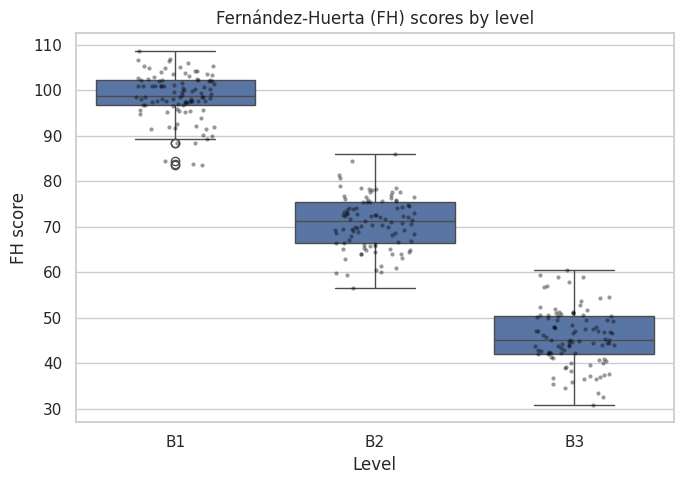

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten fh_scores into a tidy DataFrame
rows = []
for item in full_data:
    syn = item.get('synthetic_summary', {})
    for level in ('B1', 'B2', 'B3'):
        fh = syn.get(level, {}).get('fh_score')
        if fh is not None:
            rows.append({'level': level, 'fh_score': fh})

df = pd.DataFrame(rows).dropna(subset=['fh_score'])

# Plot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(7,5))
ax = sns.boxplot(data=df, x='level', y='fh_score')
sns.stripplot(data=df, x='level', y='fh_score', color='black', alpha=0.4, jitter=0.2, size=3)
ax.set_title('Fernández-Huerta (FH) scores by level')
ax.set_xlabel('Level')
ax.set_ylabel('FH score')
plt.tight_layout()
plt.show()

In [15]:
with open("/home/mshahidul/perplexity_paper/resultsV4/results_all_gpt-4.1-nano/pt.json", "r") as f_pt:
    pt_data = json.load(f_pt)

print(pt_data[0])

{'keyword': 'alterações de comportamento', 'src_lang': 'pt', 'dst_lang': 'de', 'translation': 'Verhaltensänderungen', 'kl_divergence_english_prompt': 10.38477611541748, 'kl_divergence_localized_prompt': 9.328969955444336, 'perplexity_english_prompt': 1.0238920450210571, 'perplexity_localized_prompt': 1.300574541091919, 'neg_entropy_english_prompt': -0.08370895683765411, 'neg_entropy_localized_prompt': -0.34601452946662903, 'gini_confidence_english_prompt': 0.04095529392361641, 'gini_confidence_localized_prompt': 0.2427227795124054}
